# Baseline Comparison

In [1]:
import copy
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm 

from sklearn.utils import shuffle
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

from river import metrics, evaluate, stream, compose, drift, preprocessing 

from collections import defaultdict, Counter

from AdaptiveSAM import AdaptiveSAMKNNClassifier
from SAMKNN import SAMKNNClassifier
from AdaptiveSAMPlot import AdaptiveSAMKNNClassifierPlot

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT-DDoS.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_ton_ddos = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_ton_ddos, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      96.06%   94.71%   95.38%     27365  
       1      93.71%   95.30%   94.50%     22634  
                                                  
   Macro      94.88%   95.01%   94.94%            
   Micro      94.98%   94.98%   94.98%            
Weighted      95.00%   94.98%   94.98%            

                 94.98% accuracy                   – 00:00:09 – 63.03 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      95.98%   94.64%   95.31%     54661  
       1      93.65%   95.23%   94.43%     45338  
                                                  
   Macro      94.82%   94.93%   94.87%            
   Micro      94.91%   94.91%   94.91%            
Weighted      94.92%   94.91%   94.91%            

                 94.91% accuracy                   – 00:00:19 – 63.03 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      95.90%   94.74%   95.32%    179646  
       1      93.77%   95.14%   94.45%    149621  
                                                  
   Macro      94.84%   94.94%   94.88%            
   Micro      94.92%   94.92%   94.92%            
Weighted      94.93%   94.92%   94.92%            

                 94.92% accuracy                  

In [3]:
# save
with open('model_ton_ddos_con.pkl', 'wb') as f:
    pickle.dump(model_ton_ddos, f)

In [4]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT-DoS.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_ton_dos = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_ton_dos, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      96.78%   97.87%   97.32%     47937  
       1      32.96%   24.30%   27.97%      2062  
                                                  
   Macro      64.87%   61.09%   62.65%            
   Micro      94.84%   94.84%   94.84%            
Weighted      94.15%   94.84%   94.46%            

                 94.84% accuracy                   – 00:00:09 – 63.03 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      96.91%   97.97%   97.43%     96024  
       1      33.26%   24.48%   28.20%      3975  
                                                  
   Macro      65.09%   61.22%   62.82%            
   Micro      95.05%   95.05%   95.05%            
Weighted      94.38%   95.05%   94.68%            

                 95.05% accuracy                   – 00:00:17 – 63.03 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      96.91%   97.92%   97.41%    179646  
       1      33.98%   25.51%   29.14%      7533  
                                                  
   Macro      65.44%   61.72%   63.28%            
   Micro      95.01%   95.01%   95.01%            
Weighted      94.38%   95.01%   94.66%            

                 95.01% accuracy                  

In [5]:
# save
with open('model_ton_dos_con.pkl', 'wb') as f:
    pickle.dump(model_ton_dos, f)

In [6]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT-Injection.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_ton_inj = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_ton_inj, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      95.38%   88.05%   91.57%     10451  
       1      96.90%   98.87%   97.88%     39548  
                                                  
   Macro      96.14%   93.46%   94.72%            
   Micro      96.61%   96.61%   96.61%            
Weighted      96.59%   96.61%   96.56%            

                 96.61% accuracy                   – 00:00:09 – 63.09 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      95.26%   88.60%   91.81%     20952  
       1      97.03%   98.83%   97.92%     79047  
                                                  
   Macro      96.15%   93.72%   94.87%            
   Micro      96.69%   96.69%   96.69%            
Weighted      96.66%   96.69%   96.64%            

                 96.69% accuracy                   – 00:00:18 – 63.09 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      95.16%   89.39%   92.18%    179647  
       1      97.24%   98.80%   98.01%    680346  
                                                  
   Macro      96.20%   94.10%   95.10%            
   Micro      96.83%   96.83%   96.83%            
Weighted      96.81%   96.83%   96.80%            

                 96.83% accuracy                  

In [7]:
# save
with open('model_ton_inj_con.pkl', 'wb') as f:
    pickle.dump(model_ton_inj, f)

In [8]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT-Malware.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_ton_mal = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_ton_mal, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      99.78%   99.28%   99.53%     45660  
       1      92.84%   97.70%   95.20%      4339  
                                                  
   Macro      96.31%   98.49%   97.37%            
   Micro      99.15%   99.15%   99.15%            
Weighted      99.18%   99.15%   99.16%            

                 99.15% accuracy                   – 00:00:08 – 61.06 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      99.78%   99.25%   99.51%     91265  
       1      92.54%   97.68%   95.04%      8734  
                                                  
   Macro      96.16%   98.46%   97.27%            
   Micro      99.11%   99.11%   99.11%            
Weighted      99.14%   99.11%   99.12%            

                 99.11% accuracy                   – 00:00:17 – 61.77 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      99.77%   99.25%   99.51%    179646  
       1      92.62%   97.59%   95.04%     17389  
                                                  
   Macro      96.19%   98.42%   97.27%            
   Micro      99.10%   99.10%   99.10%            
Weighted      99.14%   99.10%   99.11%            

                 99.10% accuracy                  

In [9]:
# save
with open('model_ton_mal_con.pkl', 'wb') as f:
    pickle.dump(model_ton_mal, f)

In [10]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT-MITM.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_ton_mitm = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_ton_mitm, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      99.34%   99.93%   99.63%     49662  
       1      17.07%    2.08%    3.70%       337  
                                                  
   Macro      58.21%   51.00%   51.67%            
   Micro      99.27%   99.27%   99.27%            
Weighted      98.78%   99.27%   98.99%            

                 99.27% accuracy                   – 00:00:08 – 58.53 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      99.32%   99.93%   99.62%     99303  
       1      16.47%    2.01%    3.59%       696  
                                                  
   Macro      57.89%   50.97%   51.60%            
   Micro      99.25%   99.25%   99.25%            
Weighted      98.74%   99.25%   98.95%            

                 99.25% accuracy                   – 00:00:16 – 61.06 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      99.34%   99.93%   99.64%    179646  
       1      17.76%    2.22%    3.95%      1215  
                                                  
   Macro      58.55%   51.08%   51.79%            
   Micro      99.27%   99.27%   99.27%            
Weighted      98.79%   99.27%   98.99%            

                 99.27% accuracy                  

In [11]:
# save
with open('model_ton_mitm_con.pkl', 'wb') as f:
    pickle.dump(model_ton_mitm, f)

In [12]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT-Scan.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_ton_scan = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_ton_scan, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      99.27%   99.18%   99.23%     46672  
       1      88.69%   89.78%   89.23%      3327  
                                                  
   Macro      93.98%   94.48%   94.23%            
   Micro      98.56%   98.56%   98.56%            
Weighted      98.57%   98.56%   98.56%            

                 98.56% accuracy                   – 00:00:08 – 63.01 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      99.29%   99.20%   99.24%     93383  
       1      88.81%   89.95%   89.37%      6616  
                                                  
   Macro      94.05%   94.57%   94.31%            
   Micro      98.58%   98.58%   98.58%            
Weighted      98.59%   98.58%   98.59%            

                 98.58% accuracy                   – 00:00:17 – 63.03 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      99.28%   99.19%   99.24%    179646  
       1      88.84%   89.92%   89.37%     12823  
                                                  
   Macro      94.06%   94.55%   94.30%            
   Micro      98.58%   98.58%   98.58%            
Weighted      98.58%   98.58%   98.58%            

                 98.58% accuracy                  

In [13]:
# save
with open('model_ton_scan_con.pkl', 'wb') as f:
    pickle.dump(model_ton_scan, f)

## Performance of NF BoT IoT dataset

### Without LTM

In [14]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=False, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=100000, show_time=True, show_memory=True)

[100,000]            Precision   Recall   F1       Support  
                                                  
       0      97.16%   84.65%   90.48%     19746  
       1      96.34%   99.39%   97.84%     80253  
                                                  
   Macro      96.75%   92.02%   94.16%            
   Micro      96.48%   96.48%   96.48%            
Weighted      96.50%   96.48%   96.39%            

                 96.48% accuracy                   – 00:00:17 – 72.52 KB
[200,000]            Precision   Recall   F1       Support  
                                                  
       0      97.37%   84.68%   90.58%     39203  
       1      96.38%   99.44%   97.89%    160796  
                                                  
   Macro      96.87%   92.06%   94.24%            
   Micro      96.55%   96.55%   96.55%            
Weighted      96.57%   96.55%   96.46%            

                 96.55% accuracy                   – 00:00:35 – 74.06 KB
[300,000]       

           Precision   Recall   F1       Support  
                                                  
       0      97.39%   84.74%   90.62%    270279  
       1      96.39%   99.45%   97.90%   1108994  
                                                  
   Macro      96.89%   92.09%   94.26%            
   Micro      96.56%   96.56%   96.56%            
Weighted      96.59%   96.56%   96.47%            

                 96.56% accuracy                  

### With LTM

In [15]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

model_ton_con = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model_ton_con, report, print_every=100000, show_time=True, show_memory=True)

[100,000]            Precision   Recall   F1       Support  
                                                  
       0      97.16%   84.65%   90.48%     19746  
       1      96.34%   99.39%   97.84%     80253  
                                                  
   Macro      96.75%   92.02%   94.16%            
   Micro      96.48%   96.48%   96.48%            
Weighted      96.50%   96.48%   96.39%            

                 96.48% accuracy                   – 00:00:18 – 63.09 KB
[200,000]            Precision   Recall   F1       Support  
                                                  
       0      97.37%   84.68%   90.58%     39203  
       1      96.38%   99.44%   97.89%    160796  
                                                  
   Macro      96.87%   92.06%   94.24%            
   Micro      96.55%   96.55%   96.55%            
Weighted      96.57%   96.55%   96.46%            

                 96.55% accuracy                   – 00:00:37 – 64.64 KB
[300,000]       

           Precision   Recall   F1       Support  
                                                  
       0      97.39%   84.74%   90.62%    270279  
       1      96.39%   99.45%   97.90%   1108994  
                                                  
   Macro      96.89%   92.09%   94.26%            
   Micro      96.56%   96.56%   96.56%            
Weighted      96.59%   96.56%   96.47%            

                 96.56% accuracy                  

### Saving the Model

In [16]:
# save
with open('model_ton_con.pkl', 'wb') as f:
    pickle.dump(model_ton_con, f)

# Zero-Day Attack Detection

In [17]:
# load 
with open('model_ton_con.pkl', 'rb') as f:
    model_ton_con = pickle.load(f)

#### Testing the DDoS model on ToN DDoS Zero Day Attack

In [18]:
# load 
with open('model_ton_ddos_con.pkl', 'rb') as f:
    model_ton_ddos = pickle.load(f)

In [19]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-DDoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_ddos.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN DDoS samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN DDoS samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      94.61%   97.39%   95.98%    179647  
       1      96.77%   93.39%   95.05%    150621  
                                                  
   Macro      95.69%   95.39%   95.52%            
   Micro      95.56%   95.56%   95.56%            
Weighted      95.60%   95.56%   95.56%            

                 95.56% accuracy                  


#### Testing the ToN model on ToN DDoS Zero Day Attack

In [20]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-DDoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN DDoS samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN DDoS samples
Classification Report:            Precision   Recall    F1       Support  
                                                   
       0     100.00%    78.81%   88.15%    179647  
       1      79.82%   100.00%   88.78%    150621  
                                                   
   Macro      89.91%    89.40%   88.46%            
   Micro      88.47%    88.47%   88.47%            
Weighted      90.80%    88.47%   88.44%            

                  88.47% accuracy                  


#### Testing the DoS model on ToN DoS Zero Day Attack

In [21]:
# load 
with open('model_ton_dos_con.pkl', 'rb') as f:
    model_ton_dos = pickle.load(f)

In [22]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-DoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_dos.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN DoS samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN DoS samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      96.53%   97.94%   97.23%    179647  
       1      37.45%   25.97%   30.67%      8533  
                                                  
   Macro      66.99%   61.95%   63.95%            
   Micro      94.68%   94.68%   94.68%            
Weighted      93.85%   94.68%   94.21%            

                 94.68% accuracy                  


#### Testing the ToN model on ToN DoS Zero Day Attack

In [23]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-DoS.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN DoS samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN DoS samples
Classification Report:            Precision   Recall    F1       Support  
                                                   
       0     100.00%    78.81%   88.15%    179647  
       1      18.31%   100.00%   30.95%      8533  
                                                   
   Macro      59.15%    89.40%   59.55%            
   Micro      79.77%    79.77%   79.77%            
Weighted      96.30%    79.77%   85.55%            

                  79.77% accuracy                  


#### Testing the Injection model on ToN Injection Day Attack

In [24]:
# load 
with open('model_ton_inj_con.pkl', 'rb') as f:
    model_ton_inj = pickle.load(f)

In [25]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-Injection.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_inj.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN Injection samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN Injection samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      94.63%   91.52%   93.05%    179647  
       1      97.78%   98.63%   98.20%    681347  
                                                  
   Macro      96.21%   95.07%   95.63%            
   Micro      97.15%   97.15%   97.15%            
Weighted      97.12%   97.15%   97.13%            

                 97.15% accuracy                  


#### Testing the ToN model on ToN Injection Day Attack

In [26]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-Injection.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN Injection samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN Injection samples
Classification Report:            Precision   Recall    F1       Support  
                                                   
       0      99.99%    78.81%   88.14%    179647  
       1      94.71%   100.00%   97.28%    681347  
                                                   
   Macro      97.35%    89.40%   92.71%            
   Micro      95.58%    95.58%   95.58%            
Weighted      95.81%    95.58%   95.37%            

                  95.58% accuracy                  


#### Testing the Malware model on ToN Malware Zero Day Attack

In [27]:
# load 
with open('model_ton_mal_con.pkl', 'rb') as f:
    model_ton_mal = pickle.load(f)

In [28]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-Malware.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_mal.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN Malware samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN Malware samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      99.76%   99.69%   99.72%    179647  
       1      96.98%   97.67%   97.32%     18389  
                                                  
   Macro      98.37%   98.68%   98.52%            
   Micro      99.50%   99.50%   99.50%            
Weighted      99.50%   99.50%   99.50%            

                 99.50% accuracy                  


#### Testing the ToN model on ToN Malware Zero Day Attack

In [29]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-Malware.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)


# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN Malware samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN Malware samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      99.99%   78.81%   88.14%    179647  
       1      32.56%   99.93%   49.11%     18389  
                                                  
   Macro      66.27%   89.37%   68.63%            
   Micro      80.77%   80.77%   80.77%            
Weighted      93.73%   80.77%   84.52%            

                 80.77% accuracy                  


#### Testing the MITM model on ToN MITM Zero Day Attack

In [30]:
# load 
with open('model_ton_mitm_con.pkl', 'rb') as f:
    model_ton_mitm = pickle.load(f)

In [31]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-MITM.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_mitm.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN MITM samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN MITM samples
Classification Report:            Precision   Recall    F1       Support  
                                                   
       0      98.78%   100.00%   99.39%    179647  
       1       0.00%     0.00%    0.00%      2215  
                                                   
   Macro      49.39%    50.00%   49.69%            
   Micro      98.78%    98.78%   98.78%            
Weighted      97.58%    98.78%   98.18%            

                  98.78% accuracy                  


#### Testing the ToN model on ToN MITM Zero Day Attack

In [32]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-MITM.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN MITM samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN MITM samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0     100.00%   78.81%   88.15%    179647  
       1       5.49%   99.86%   10.41%      2215  
                                                  
   Macro      52.74%   89.34%   49.28%            
   Micro      79.06%   79.06%   79.06%            
Weighted      98.85%   79.06%   87.20%            

                 79.06% accuracy                  


#### Testing the Scan model on ToN Scan Zero Day Attack

In [33]:
# load 
with open('model_ton_scan_con.pkl', 'rb') as f:
    model_ton_scan = pickle.load(f)

In [34]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-Scan.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_scan.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN Scan samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN Scan samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0      98.88%   99.10%   98.99%    179647  
       1      87.93%   85.47%   86.68%     13823  
                                                  
   Macro      93.41%   92.28%   92.84%            
   Micro      98.12%   98.12%   98.12%            
Weighted      98.10%   98.12%   98.11%            

                 98.12% accuracy                  


#### Testing the ToN model on ToN Scan Zero Day Attack

In [35]:
from river.metrics import ClassificationReport

# Load datasets
data = pd.read_csv("Augmented_NF-ToN-IoT-Scan.csv")

X = data.drop(['Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize metrics
Report = metrics.ClassificationReport()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X, y):
    y_pred = model_ton_con.predict_one(xi)
    Report.update(yi, y_pred)


# Output the results
print("Printing the results for FGSM NF-ToN Scan samples")
print("Classification Report:", Report)

Printing the results for FGSM NF-ToN Scan samples
Classification Report:            Precision   Recall   F1       Support  
                                                  
       0     100.00%   78.81%   88.15%    179647  
       1      26.63%   99.97%   42.06%     13823  
                                                  
   Macro      63.31%   89.39%   65.10%            
   Micro      80.32%   80.32%   80.32%            
Weighted      94.76%   80.32%   84.85%            

                 80.32% accuracy                  


# Performance of SAMKNN 

### SAMKNN with LTM

In [36]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

SAMKNN_model = compose.Pipeline(
    preprocessing.StandardScaler(),
    SAMKNNClassifier(ltm_size=0.4, max_window_size=300, min_stm_size=30, n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=True)
)
#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

evaluate.progressive_val_score(dataset, SAMKNN_model, report, print_every=100000, show_time=True, show_memory=True)

[100,000]            Precision   Recall   F1       Support  
                                                  
       0      95.07%   81.92%   88.01%     19746  
       1      95.70%   98.95%   97.30%     80254  
                                                  
   Macro      95.38%   90.44%   92.65%            
   Micro      95.59%   95.59%   95.59%            
Weighted      95.57%   95.59%   95.46%            

                 95.59% accuracy                   – 00:00:38 – 11 MB
[200,000]            Precision   Recall   F1       Support  
                                                  
       0      95.52%   81.81%   88.13%     39203  
       1      95.71%   99.06%   97.36%    160797  
                                                  
   Macro      95.62%   90.44%   92.75%            
   Micro      95.68%   95.68%   95.68%            
Weighted      95.68%   95.68%   95.55%            

                 95.68% accuracy                   – 00:01:17 – 18.13 MB
[300,000]          

           Precision   Recall   F1       Support  
                                                  
       0      95.69%   81.59%   88.08%    270279  
       1      95.67%   99.11%   97.36%   1108995  
                                                  
   Macro      95.68%   90.35%   92.72%            
   Micro      95.67%   95.67%   95.67%            
Weighted      95.67%   95.67%   95.54%            

                 95.67% accuracy                  

### SAMKNN without LTM

In [37]:
data=pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT.csv")
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

SAMKNN_model = compose.Pipeline(
    preprocessing.StandardScaler(),
    SAMKNNClassifier(ltm_size=0.4, max_window_size=300, min_stm_size=30, n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=False)
)
#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

evaluate.progressive_val_score(dataset, SAMKNN_model, report, print_every=100000, show_time=True, show_memory=True)

[100,000]            Precision   Recall   F1       Support  
                                                  
       0      95.69%   75.17%   84.20%     19746  
       1      94.20%   99.17%   96.62%     80254  
                                                  
   Macro      94.95%   87.17%   90.41%            
   Micro      94.43%   94.43%   94.43%            
Weighted      94.49%   94.43%   94.17%            

                 94.43% accuracy                   – 00:00:12 – 5.62 MB
[200,000]            Precision   Recall   F1       Support  
                                                  
       0      95.96%   75.32%   84.39%     39203  
       1      94.28%   99.23%   96.69%    160797  
                                                  
   Macro      95.12%   87.27%   90.54%            
   Micro      94.54%   94.54%   94.54%            
Weighted      94.61%   94.54%   94.28%            

                 94.54% accuracy                   – 00:00:24 – 7.4 MB
[300,000]          

           Precision   Recall   F1       Support  
                                                  
       0      95.99%   75.12%   84.28%    270279  
       1      94.24%   99.23%   96.67%   1108995  
                                                  
   Macro      95.12%   87.18%   90.48%            
   Micro      94.51%   94.51%   94.51%            
Weighted      94.58%   94.51%   94.25%            

                 94.51% accuracy                  

## Statistical Testing

In [43]:
import pandas as pd
from sklearn.utils import shuffle
from river import stream, compose, preprocessing, metrics
import numpy as np
from scipy import stats
from tqdm import tqdm  # Ensure tqdm is imported

# Load and Prepare Data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT.csv")

# Sample the data for faster testing 
sample_size = 100000  
if len(data) > sample_size:
    data = data.sample(n=sample_size, random_state=42)
    print(f"Data sampled to {sample_size} instances for faster processing.")

X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# **Option 1:** Keep labels as integers
# Ensure that labels are integers
y = y.astype(int)

# Check class distribution
class_counts = y.value_counts()
print("Class Distribution:")
print(class_counts)

# Parameters for Evaluation
n_runs = 5  # Number of independent evaluation runs
random_states = np.random.randint(0, 10000, size=n_runs)

# Containers to Store Performance Metrics
accuracy_adaptive = []
accuracy_samknn = []

# Define Classifiers
def get_models():
    model_adaptive = compose.Pipeline(
        preprocessing.StandardScaler(),
        ('classifier', AdaptiveSAMKNNClassifier(
            max_window_size=300,  
            ltm_size=0.4,
            use_ltm=True,
            max_ltm_size_threshold=0.30
        ))
    )
    
    model_samknn = compose.Pipeline(
        preprocessing.StandardScaler(),
        ('classifier', SAMKNNClassifier(
            ltm_size=0.4, 
            max_window_size=300, 
            min_stm_size=30, 
            n_neighbors=5, 
            stm_size_option='maxACCApprox', 
            use_ltm=True
        ))
    )
    
    return model_adaptive, model_samknn

# Evaluation Loop with Optimizations
for i in tqdm(range(n_runs), desc="Runs"):
    print(f"\nRun {i+1}/{n_runs}")
    
    # Shuffle Data with a Unique Random State
    X_shuffled, y_shuffled = shuffle(X, y, random_state=random_states[i])
    dataset = stream.iter_pandas(X_shuffled, y_shuffled)
    
    # Initialize Models
    model_adaptive, model_samknn = get_models()
    
    # Initialize Metrics
    metric_adaptive = metrics.Accuracy()
    metric_samknn = metrics.Accuracy()
    
    # Evaluate both classifiers in a single pass
    for xi, yi_label in dataset:
        # 'xi' is already a dictionary; no need to convert
        
        # AdaptiveSAMKNNClassifier
        y_pred_adaptive = model_adaptive.predict_one(xi)
        model_adaptive.learn_one(xi, yi_label)
        metric_adaptive.update(yi_label, y_pred_adaptive)
        
        # SAMKNNClassifier
        y_pred_knn = model_samknn.predict_one(xi)
        model_samknn.learn_one(xi, yi_label)
        metric_samknn.update(yi_label, y_pred_knn)
        
    # Collect Metrics for the Current Run
    fold_accuracy_adaptive = metric_adaptive.get()
    fold_accuracy_samknn = metric_samknn.get()  # Corrected line
    
    accuracy_adaptive.append(fold_accuracy_adaptive)
    accuracy_samknn.append(fold_accuracy_samknn)
    
    # Display Metrics for the Current Run
    print(f"AdaptiveSAMKNNClassifier Accuracy: {fold_accuracy_adaptive:.4f}")
    print(f"SAMKNNClassifier Accuracy: {fold_accuracy_samknn:.4f}")

# Statistical Testing

# Convert lists to NumPy arrays for easier manipulation
accuracy_adaptive = np.array(accuracy_adaptive)
accuracy_samknn = np.array(accuracy_samknn)

# Calculate Mean and Standard Deviation
mean_adaptive = accuracy_adaptive.mean()
std_adaptive = accuracy_adaptive.std(ddof=1)
mean_samknn = accuracy_samknn.mean()
std_samknn = accuracy_samknn.std(ddof=1)

# Calculate 95% Confidence Intervals
conf_int_adaptive = stats.t.interval(
    0.95, 
    len(accuracy_adaptive)-1, 
    loc=mean_adaptive, 
    scale=std_adaptive/np.sqrt(n_runs)
)

conf_int_samknn = stats.t.interval(
    0.95, 
    len(accuracy_samknn)-1, 
    loc=mean_samknn, 
    scale=std_samknn/np.sqrt(n_runs)
)

# Perform Paired t-test
t_stat, p_value = stats.ttest_rel(accuracy_adaptive, accuracy_samknn)

# Step 6: Display Results
print("\n=== Performance Metrics ===")
print(f"AdaptiveSAMKNNClassifier Accuracy: {accuracy_adaptive}")
print(f"Mean Accuracy: {mean_adaptive:.4f}")
print(f"Standard Deviation: {std_adaptive:.4f}")
print(f"95% Confidence Interval: ({conf_int_adaptive[0]:.4f}, {conf_int_adaptive[1]:.4f})\n")

print(f"SAMKNNClassifier Accuracy: {accuracy_samknn}")
print(f"Mean Accuracy: {mean_samknn:.4f}")
print(f"Standard Deviation: {std_samknn:.4f}")
print(f"95% Confidence Interval: ({conf_int_samknn[0]:.4f}, {conf_int_samknn[1]:.4f})\n")

print("=== Statistical Test ===")
print(f"Paired t-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Result: The difference in accuracy is statistically significant.")
else:
    print("Result: The difference in accuracy is not statistically significant.")


Data sampled to 100000 instances for faster processing.
Class Distribution:
Label
1    80254
0    19746
Name: count, dtype: int64


Runs:   0%|                                               | 0/5 [00:00<?, ?it/s]


Run 1/5


Runs:  20%|███████▊                               | 1/5 [00:47<03:10, 47.57s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9644
SAMKNNClassifier Accuracy: 0.9482

Run 2/5


Runs:  40%|███████████████▌                       | 2/5 [01:35<02:24, 48.03s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9639
SAMKNNClassifier Accuracy: 0.9470

Run 3/5


Runs:  60%|███████████████████████▍               | 3/5 [04:16<03:18, 99.34s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9641
SAMKNNClassifier Accuracy: 0.9489

Run 4/5


Runs:  80%|███████████████████████████████▏       | 4/5 [05:34<01:31, 91.16s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9643
SAMKNNClassifier Accuracy: 0.9479

Run 5/5


Runs: 100%|███████████████████████████████████████| 5/5 [06:24<00:00, 76.84s/it]

AdaptiveSAMKNNClassifier Accuracy: 0.9638
SAMKNNClassifier Accuracy: 0.9484

=== Performance Metrics ===
AdaptiveSAMKNNClassifier Accuracy: [0.96441 0.96388 0.96411 0.96429 0.96383]
Mean Accuracy: 0.9641
Standard Deviation: 0.0003
95% Confidence Interval: (0.9638, 0.9644)

SAMKNNClassifier Accuracy: [0.94817 0.94704 0.94886 0.9479  0.94839]
Mean Accuracy: 0.9481
Standard Deviation: 0.0007
95% Confidence Interval: (0.9472, 0.9489)

=== Statistical Test ===
Paired t-test: t-statistic = 53.6448, p-value = 0.0000
Result: The difference in accuracy is statistically significant.


### Visualising the Performance of BoT IoT datset

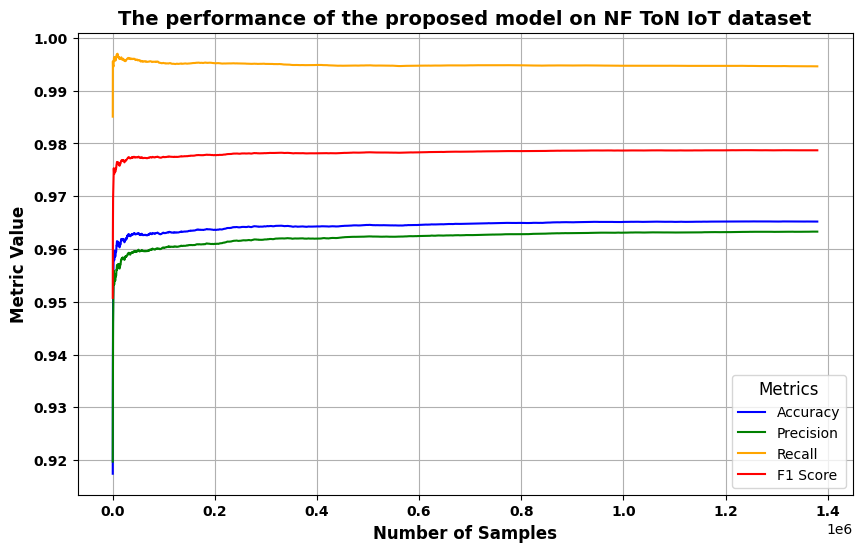

In [41]:
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
from river import metrics, stream, compose, preprocessing
from sklearn.utils import shuffle
import pandas as pd

# Load dataset
data = pd.read_csv("/Users/promisea/SAMKNN/NF-TON-IoT_v1/NF-ToN-IoT.csv")

# Prepare features and target
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Initialize rolling window size
window_size = 500

# Initialize rolling metrics storage
rolling_acc = deque(maxlen=window_size)
rolling_pre = deque(maxlen=window_size)
rolling_rec = deque(maxlen=window_size)
rolling_f1 = deque(maxlen=window_size)

# Initialize lists for storing the cumulative metrics for plotting
acc_values = []
pre_values = []
rec_values = []
f1_values = []
window_indices = []

# Model setup
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=True, max_ltm_size_threshold=0.30))
)

# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Shuffle dataset
X, y = shuffle(X, y, random_state=42)

# Iterate over the test stream and update metrics
for idx, (xi, yi) in enumerate(stream.iter_pandas(X, y)):
    y_pred = model.predict_one(xi)
    model.learn_one(xi, yi)
    
    # Update metrics for the current sample
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)
    
    # Update rolling metrics
    rolling_acc.append(Acc.get())
    rolling_pre.append(Pre.get())
    rolling_rec.append(Rec.get())
    rolling_f1.append(F1.get())
    
    # After every 500 samples, store the average of the rolling window
    if len(rolling_acc) == window_size:
        acc_values.append(np.mean(rolling_acc))
        pre_values.append(np.mean(rolling_pre))
        rec_values.append(np.mean(rolling_rec))
        f1_values.append(np.mean(rolling_f1))
        window_indices.append(idx)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(window_indices, acc_values, label='Accuracy', color='blue')
plt.plot(window_indices, pre_values, label='Precision', color='green')
plt.plot(window_indices, rec_values, label='Recall', color='orange')
plt.plot(window_indices, f1_values, label='F1 Score', color='red')

# Make the title and labels bold
plt.xlabel('Number of Samples', fontsize=12, fontweight='bold')
plt.ylabel('Metric Value', fontsize=12, fontweight='bold')
plt.title('The performance of the proposed model on NF ToN IoT dataset', fontsize=14, fontweight='bold')

# Make the legend bold
plt.legend(fontsize=10, title_fontsize='12', title='Metrics', loc='best')

# Make the ticks bold
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.grid(True)
plt.savefig('NF_ToN_Conference.png')
plt.show()